# Análisis exploratorio de datos

En este taller haremos análisis exploratorio de un conjunto de datos de calidad de aire

In [65]:
Sys.setlocale("LC_ALL", 'en_US.UTF-8')

library(datasets)
library(dplyr)
library(ggplot2)

options(repr.plot.width = 6, repr.plot.height = 4)

[1] "en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8"

## Leer datos desde una fuente web

In [6]:
calidad_aire = read.csv("https://raw.githubusercontent.com/rpmunoz/topicos_ingenieria_1/master/clase_4/data/nyc_calidad_aire.csv")
head(calidad_aire)

Ozono,Radiacion_solar,Viento,Temperatura,Mes,Dia
41,190,11.91,19.4,5,1
36,118,12.87,22.2,5,2
12,149,20.28,23.3,5,3
18,313,18.51,16.7,5,4
NA,NA,23.01,13.3,5,5
28,NA,23.98,18.9,5,6


- Ozono: Ozono promedio en partes por billón (ppb)
- Radiacion_solar: Radiación solar en unidades de Langleys en el rango de longitud de donda 4.000-7.700 Angstroms
- Viento: Velocidad promedio del viento en unidades de kilómetros por hora
- Temperatura: Máxima temperatura del día en unidades de grados Celcius

## 1. Análisis de variables individuales

Supongamos que queremos estudiar la información contenida en la columna Viento

### 1.1 **Resumen usando 6 números**

Información acerca del mínimo, 1er quartil, mediana, promedio, 3er quartil y máximo.
Función **summary**

In [7]:
summary(calidad_aire$Viento)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.74   11.91   15.61   16.02   18.51   33.31 

### 1.2 **Gráficos de caja o boxplot**

Consiste en el uso de cajas rectangulares encerradas por arriba y por abajo de líneas que representan los quartiles Q3 y Q1 respectivamente. La línea que pasa por el centro de la caja es la mediana. Los bigotes son las líneas que se extienden desde el centro de la caja hasta los valores máximos y mínimos. En caso de existir valores atípicos, estos se denota usando símbolos fuera de los bigotes.

<img src="https://upload.wikimedia.org/wikipedia/commons/2/25/Boxplot.svg" alt="boxplot" style="width: 300px;"/>


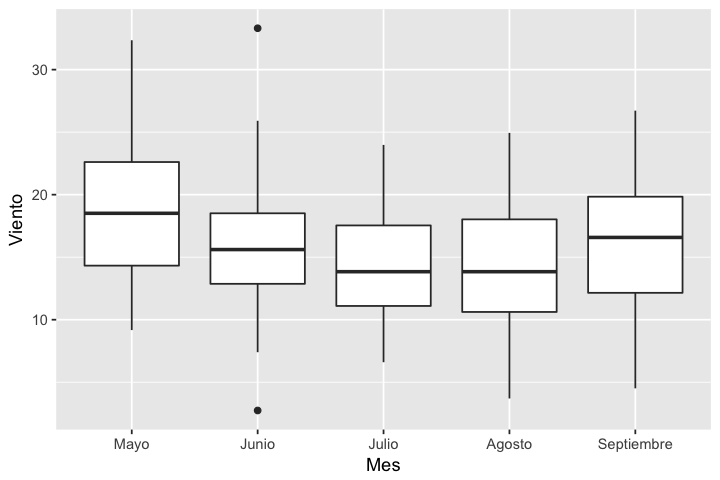

In [22]:
ggplot(calidad_aire, aes(x = Mes, y = Viento)) +
        geom_boxplot()

R interpreta la columna Mes como una variable numérica y continua. Debemos transformar el tipo de datos de la columna Mes en un factor etiquetado para usar como varible de agrupación.

In [15]:
calidad_aire$Mes <- factor(calidad_aire$Mes,
                           labels = c("Mayo", "Junio", "Julio", "Agosto", "Septiembre"))

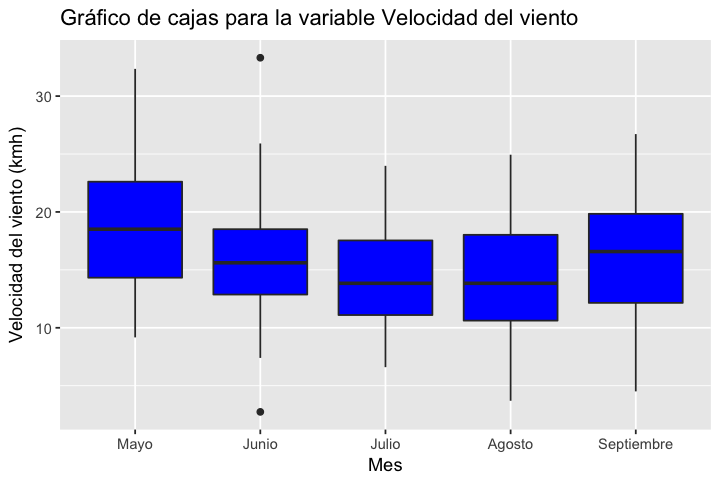

In [24]:
ggplot(calidad_aire, aes(x = Mes, y = Viento)) +
        geom_boxplot(fill=I("blue")) +
        ggtitle("Gráfico de cajas para la variable Velocidad del viento") + 
        xlab("Mes") +
        ylab("Velocidad del viento (kmh)")

### 1.3 **Histogramas**

El histograma podría considerar el gráfico más básico de todos. Un histograma corresponde a un gráfico de barras en el cual cada barra representa la frecuencua absoluta o relativa de los casos dentro de cierto rango de valores. Típicamente la barras tienen orientación vertical.

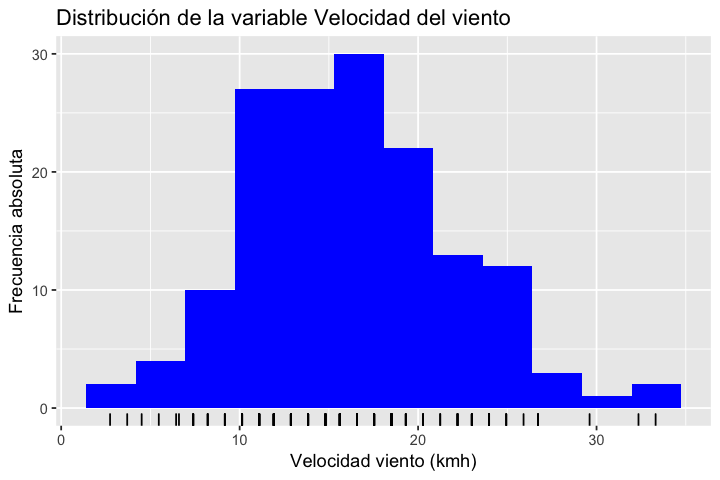

In [31]:
ggplot(calidad_aire, aes(Viento)) +
    geom_histogram(bins=12, fill=I("blue")) +
    ggtitle("Distribución de la variable Velocidad del viento") + 
    xlab("Velocidad viento (kmh)") +
    ylab("Frecuencia absoluta") +
    geom_rug()

### 1.4 **Gráfico de barras**

Un gráfico de barras se emplea cuando la variable bajo análisis es del tipo nominal (cualitativa). Este tipo de gráfico está compuesto una serie de columnas o filas ordenadas.

Las columnas son dispuestas sobre una etiqueta que representa una variable nominal

La altura de la columna indica el tamaño del grupo definido por la etiqueta de la columna.

In [56]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


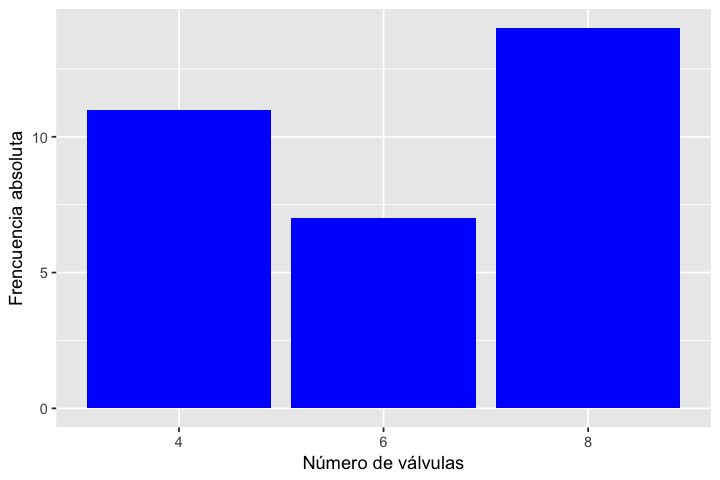

In [59]:
ggplot(data = mtcars, aes(as.factor(cyl))) +
    geom_bar(stat="count", fill=I("blue")) +
    xlab("Número de válvulas") +
    ylab("Frencuencia absoluta")

## 2. Análisis de relaciones de variables

Analizar la existencia de posibles relaciones entre las variables del dataset.

En general se aplica análisis bidimensional (dos variables). Los casos típicos son,
- Ambas variables son cualitativas
- Ambas variables son cuantitativas
- Una variable es cuantitativa y la otra cualitativa


In [66]:
salarios <-read.csv("https://raw.githubusercontent.com/rpmunoz/topicos_ingenieria_1/master/clase_4/data/salarios_hombres_usa.csv") 
head(salarios)

salarios_muestra <- salarios[1:100,] # usamos las primeras 100 filas

X,numero,año,escolaridad,experiencia,sindicalizado,etnia,casado,salud,sueldo,industria,ocupacion,lugar_residencia
1,13,1980,14,1,no,other,no,no,1.197540,Business_and_Repair_Service,Service_Workers,north_east
2,13,1981,14,2,sí,other,no,no,1.853060,Personal_Service,Service_Workers,north_east
3,13,1982,14,3,no,other,no,no,1.344462,Business_and_Repair_Service,Service_Workers,north_east
4,13,1983,14,4,no,other,no,no,1.433213,Business_and_Repair_Service,Service_Workers,north_east
5,13,1984,14,5,no,other,no,no,1.568125,Personal_Service,"Craftsmen, Foremen_and_kindred",north_east
6,13,1985,14,6,no,other,no,no,1.699891,Business_and_Repair_Service,"Managers, Officials_and_Proprietors",north_east


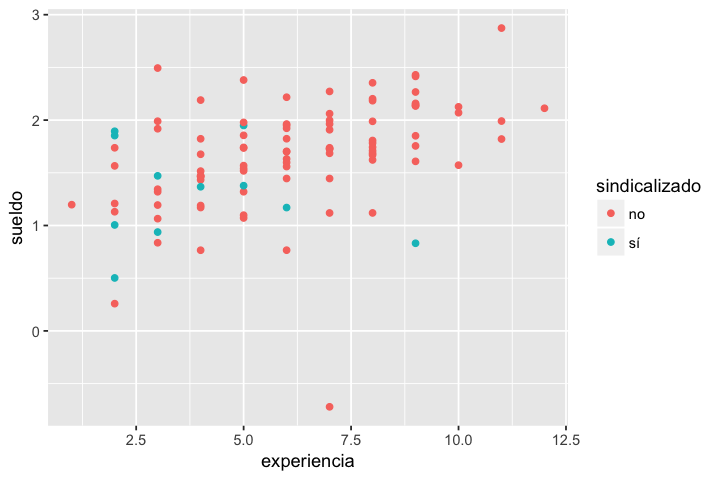

In [67]:
ggplot(salarios_muestra, aes(experiencia, sueldo)) + geom_point(aes(colour = sindicalizado))

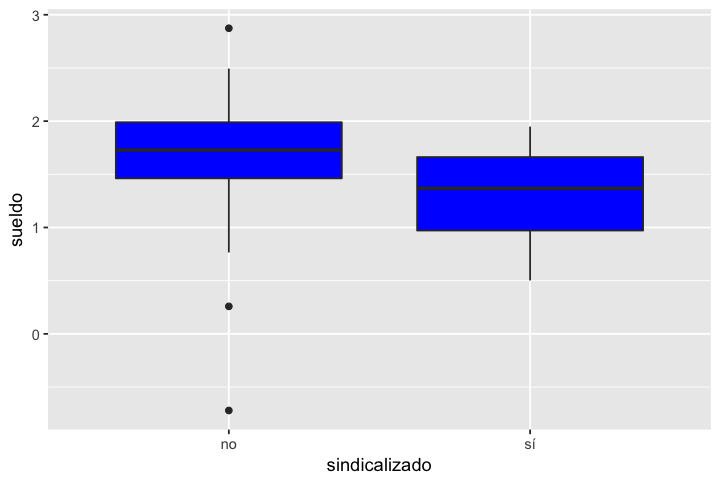

In [68]:
ggplot(salarios_muestra, aes(x = sindicalizado, y = sueldo)) +
        geom_boxplot(fill=I("blue"))

Se podría derivar que los trabajadores que no están sindicalizados en promedio tienen mejores sueldos que los que sí están sindicalizados.

Es importante tener en cuenta que una correlación no implica relación causal. Es posible que los trabajos mejor pagados no permitan a sus trabajadores sindicalizarse.